## Clustering

+ Objective : K-means clustering을 통해 어떤 store간에 유의성이 존재하는지 확인
    - clustering으로 얻은 store간의 상관관계 파악
        - Cluster 3 : {store1, 2, 3} -> 3의 특정 상품이 나머지 상품들과의 상관관계 존재하는지 파악

In [1]:
import pandas as pd
from sklearn.cluster import KMeans

/opt/conda/lib/python3.8/site-packages/pandas/compat/_optional.py:161: UserWarning: Pandas requires version '2.7.1' or newer of 'numexpr' (version '2.7.0' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 242 kB 10.4 MB/s eta 0:00:01


In [4]:
region = pd.read_excel('../data/preprocessed/region_data.xlsx')

In [5]:
region

,Unnamed: 0,0,1
0,Litoměřice,50.534079,14.131799
1,Politischer Bezirk Eferding,48.344538,13.964426
2,Louny,50.357291,13.796919
3,Politischer Bezirk Steyr-Land,47.907106,14.528380
4,Flandre-Occidentale,51.040475,2.999421
...,...,...,...
338,Klatovy,49.395118,13.293595
339,Plzeň-město,49.747741,13.377525
340,Plzeň-sever,49.881423,13.281288
341,Rokycany,48.961757,21.143825


In [6]:
data = region[[0,1]]

In [7]:
data

,0,1
0,50.534079,14.131799
1,48.344538,13.964426
2,50.357291,13.796919
3,47.907106,14.528380
4,51.040475,2.999421
...,...,...
338,49.395118,13.293595
339,49.747741,13.377525
340,49.881423,13.281288
341,48.961757,21.143825


### Elbow method

In [9]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 282 kB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 31.2 MB 17.9 MB/s eta 0:00:01


In [10]:
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


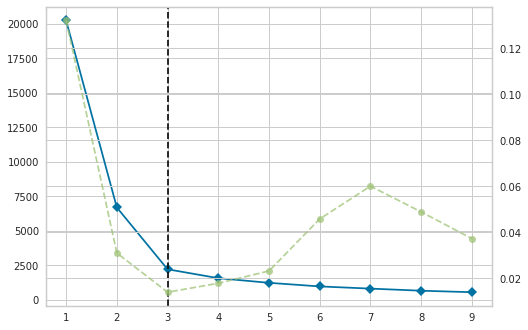

In [11]:
model = KMeans()
visualizer = KElbowVisualizer(model, k = (1, 10))
visualizer.fit(data)

In [12]:
k = 3
model = KMeans(n_clusters = k, random_state = 10)
model.fit(data)
region['cluster'] = model.fit_predict(data)

In [13]:
region

,Unnamed: 0,0,1,cluster
0,Litoměřice,50.534079,14.131799,0
1,Politischer Bezirk Eferding,48.344538,13.964426,0
2,Louny,50.357291,13.796919,0
3,Politischer Bezirk Steyr-Land,47.907106,14.528380,0
4,Flandre-Occidentale,51.040475,2.999421,2
...,...,...,...,...
338,Klatovy,49.395118,13.293595,0
339,Plzeň-město,49.747741,13.377525,0
340,Plzeň-sever,49.881423,13.281288,0
341,Rokycany,48.961757,21.143825,0


In [14]:
import matplotlib.pyplot as plt

In [15]:
region_12 = region.copy()

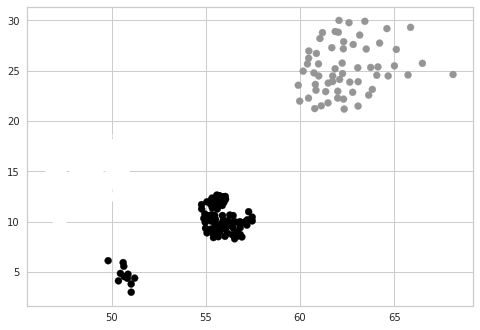

In [16]:
plt.scatter(region_12[0], region_12[1], c = region_12['cluster'])

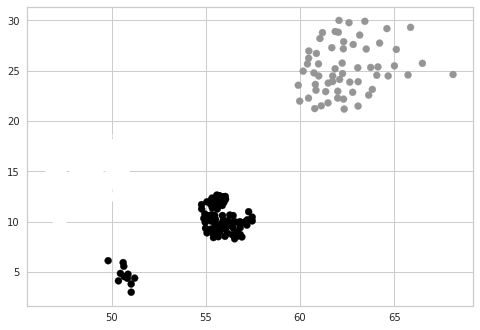

In [17]:
plt.scatter(region[0], region[1], c = region['cluster'])

In [19]:
from yellowbrick.cluster import InterclusterDistance

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


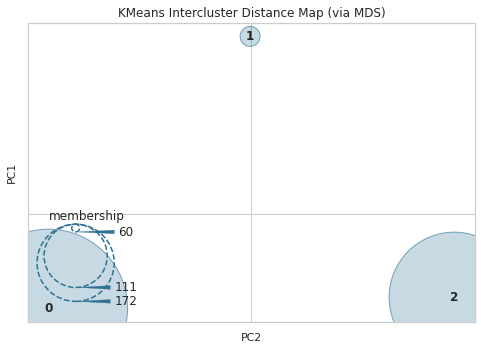

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [20]:
visualizer = InterclusterDistance(model)
visualizer.fit(data)
visualizer.show()

In [17]:
model

KMeans(n_clusters=4, random_state=10)

In [21]:
region['cluster'].value_counts()

0    172
2    111
1     60
Name: cluster, dtype: int64

In [22]:
region2 = region[['Unnamed: 0', 'cluster']]

In [23]:
region2

,Unnamed: 0,cluster
0,Litoměřice,0
1,Politischer Bezirk Eferding,0
2,Louny,0
3,Politischer Bezirk Steyr-Land,0
4,Flandre-Occidentale,2
...,...,...
338,Klatovy,0
339,Plzeň-město,0
340,Plzeň-sever,0
341,Rokycany,0


In [24]:
region_match = {}
for i in range(region2.shape[0]):
    region_match[region2['Unnamed: 0'].iloc[i]] = region2['cluster'].iloc[i]

In [25]:
region_match

{'Litoměřice': 0,
 'Politischer Bezirk Eferding': 0,
 'Louny': 0,
 'Politischer Bezirk Steyr-Land': 0,
 'Flandre-Occidentale': 2,
 'Sankt Pölten Stadt': 0,
 'Benešov': 0,
 'Politischer Bezirk Sankt Johann im Pongau': 0,
 'Politischer Bezirk Zwettl': 0,
 'Chrudim': 0,
 'Praha-východ': 0,
 'Politischer Bezirk Hermagor': 0,
 'Politischer Bezirk Korneuburg': 0,
 'Politischer Bezirk Salzburg-Umgebung': 0,
 'Politischer Bezirk Gmünd': 0,
 'Nový Jičín': 0,
 'Politischer Bezirk Spittal an der Drau': 0,
 'Politischer Bezirk Sankt Pölten': 0,
 'Krems an der Donau Stadt': 0,
 'Politischer Bezirk Gänserndorf': 0,
 'Politischer Bezirk Freistadt': 0,
 'Žďár nad Sázavou': 0,
 'Politischer Bezirk Ried im Innkreis': 0,
 'Politischer Bezirk Rohrbach': 0,
 'Eisenstadt Stadt': 0,
 'Blansko': 0,
 'Politischer Bezirk Kirchdorf an der Krems': 0,
 'Graz Stadt': 0,
 'Politischer Bezirk Hallein': 0,
 'Politischer Bezirk Wiener Neustadt': 0,
 'Politischer Bezirk Zell am See': 0,
 'Innsbruck Stadt': 0,
 'Hvidovre

+ 문제 : 머신러닝 모델들은 feature selection을 진행해주어야함. 근데 클러스터 내에 상점들이 이렇게 많아버리면 도움이 안됨. 

- 만약 우선 관련이 있다고 보이면, 그때는 mlp를 써야될 가능성이 높아짐

### Cluster에 따른 store할당

In [26]:
dh = pd.read_excel('../data/raw/Dealer_Hierarchies.xlsx')

In [27]:
dh

,Store,Store Owner,Region Level 1,Region Level 2,Urban/Rural
0,1,1,Eisenstadt-Umgebung,GWR,Urban
1,2,1,Politischer Bezirk Güssing,GWR,Urban
2,3,1,Politischer Bezirk Jennersdorf,GWR,Urban
3,4,1,Politischer Bezirk Jennersdorf,GWR,Urban
4,5,1,Politischer Bezirk Oberpullendorf,GWR,Urban
...,...,...,...,...,...
637,638,132,Graz Stadt,MMJ,Rural
638,639,300,Politischer Bezirk Eferding,ICA,Rural
639,640,301,Benešov,UQM,Rural
640,641,4,Nivala-Haapajärvi,IRA,Urban


In [28]:
def match_region(region_name):
    return region_match[region_name]

In [29]:
dh['cluster'] = dh['Region Level 1'].apply(match_region)

In [30]:
dh

,Store,Store Owner,Region Level 1,Region Level 2,Urban/Rural,cluster
0,1,1,Eisenstadt-Umgebung,GWR,Urban,0
1,2,1,Politischer Bezirk Güssing,GWR,Urban,0
2,3,1,Politischer Bezirk Jennersdorf,GWR,Urban,0
3,4,1,Politischer Bezirk Jennersdorf,GWR,Urban,0
4,5,1,Politischer Bezirk Oberpullendorf,GWR,Urban,0
...,...,...,...,...,...,...
637,638,132,Graz Stadt,MMJ,Rural,0
638,639,300,Politischer Bezirk Eferding,ICA,Rural,0
639,640,301,Benešov,UQM,Rural,0
640,641,4,Nivala-Haapajärvi,IRA,Urban,1


In [31]:
cluster_store = {0:[], 1:[],2:[]}
temp = dh[['Store', 'cluster']]
for i in range(temp.shape[0]):
    cluster_store[temp['cluster'].iloc[i]].append(int(temp['Store'].iloc[i]))

In [32]:
cluster_store

{0: [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  128,
  137,
  138,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  173,

In [33]:
import json

In [34]:
with open('../data/preprocessed/cluster_store.json', 'w') as f:
    json.dump(cluster_store, f)

In [36]:
dh[dh['Region Level 1'] == 'Salo']

,Store,Store Owner,Region Level 1,Region Level 2,Urban/Rural,cluster
504,505,248,Salo,NGO,Urban,0


In [29]:
dh[dh['Store Owner'] == 248]

,Store,Store Owner,Region Level 1,Region Level 2,Urban/Rural,cluster
487,488,248,Litoměřice,NGO,Rural,0
488,489,248,Lyngby-Tårbæk Kommune,NGO,Urban,3
489,490,248,Fanø Kommune,NGO,Urban,3
503,504,248,Litoměřice,NGO,Rural,0
504,505,248,Salo,NGO,Urban,2


### 특정 cluster간 store간의 상관관계 파악

In [30]:
store = 1
store_list = dh[dh['cluster'] == store]['Store'].tolist()

In [31]:
len(store_list)

61

In [32]:
# KeyBoard 라는 물품에 대한 상관관계 조사
# storelist에 속한 store들의 시기에 따른 KEyboard 판매량
retail = pd.read_csv('../data/raw/Retail data.csv')

In [33]:
retail['Month'] = pd.to_datetime(retail.Month)

In [34]:
retail

,Month,Sales Total,Store,Product Type,Item
0,2021-02-01,1,1,Electronics,Phone Charger
1,2021-02-01,5,1,Grocery,Shrimp
2,2021-02-01,2,1,Grocery,Noodles
3,2021-02-01,1,1,Grocery,King Crab
4,2021-03-01,1,1,Electronics,Ear Buds
...,...,...,...,...,...
125221,2021-07-01,1,642,Electronics,Ear Buds
125222,2021-08-01,0,642,Electronics,Power Cord
125223,2021-09-01,0,642,Home Goods,Nails
125224,2022-02-01,1,642,Electronics,Keyboard


In [35]:
date_range = pd.date_range('2015-01-01','2022-03-01', freq='MS').astype('str').tolist()

In [36]:
sales_info = retail[(retail['Month'] == '2015-02-01') & (retail['Item'] == 'Shrimp') & 
               (retail['Store'] == 492)]

In [37]:
sales_info.shape

(1, 5)

In [38]:
sales_info['Sales Total'].iloc[0]

1

In [39]:
cluster_data = {}
Item = 'Shrimp'
# {'1' : [0,3,2..], '2' : [3,1,2..]}
for store_id in store_list:
    sales = []
    for date in date_range:
#         try:
#             sales_info = retail[(retail['Month'] == date) & (retail['Item'] == Item) & 
#                (retail['Store'] == store_id)]
#             sales.append(sales_info['Sales Total'].iloc[0])
#         except ValueError or IndexError:
#             sales.append(0)
        sales_info = retail[(retail['Month'] == date) & (retail['Item'] == Item) & 
               (retail['Store'] == store_id)]
        if sales_info.shape[0] == 0:
            sales.append(0)
        else:
            sales.append(sales_info['Sales Total'].iloc[0])
    cluster_data[store_id] = sales

In [40]:
temp = pd.DataFrame(cluster_data)

In [41]:
temp.corr()

,492,497,499,508,510,514,515,521,523,526,...,626,627,628,631,632,634,636,637,641,642
492,1.000000,0.240916,0.073765,-0.074912,0.176290,NaN,0.040114,0.038026,-0.052662,0.134622,...,0.073926,0.070331,-0.017971,0.374346,0.317145,0.120070,-0.059011,-0.150279,0.176385,-0.046914
497,0.240916,1.000000,-0.069000,-0.022296,-0.047308,NaN,0.005150,-0.052206,-0.015674,0.185309,...,-0.086144,0.012617,-0.082904,0.142784,0.231256,-0.079413,0.145807,-0.088449,0.004922,-0.040958
499,0.073765,-0.069000,1.000000,-0.072818,0.013519,NaN,0.413153,0.114763,0.134373,0.190153,...,0.131463,-0.008585,0.267486,0.278504,0.140652,0.022694,0.174112,0.278341,0.443368,0.108687
508,-0.074912,-0.022296,-0.072818,1.000000,-0.049925,NaN,0.044840,-0.055095,-0.016541,-0.110995,...,-0.090911,-0.002774,-0.087491,-0.001046,0.207943,-0.083808,-0.069244,-0.093343,0.055401,-0.043224
510,0.176290,-0.047308,0.013519,-0.049925,1.000000,NaN,0.145309,0.117801,-0.035097,-0.015981,...,0.086804,0.035079,-0.029343,0.268215,0.211361,-0.100471,0.066115,-0.018568,0.085592,0.107764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,0.120070,-0.079413,0.022694,-0.083808,-0.100471,NaN,0.075500,0.000755,-0.058915,0.157432,...,0.112177,0.058886,-0.005529,0.093552,0.084710,1.000000,0.110985,0.059221,0.197330,-0.070243
636,-0.059011,0.145807,0.174112,-0.069244,0.066115,NaN,0.325229,0.199553,-0.048677,0.237205,...,-0.021233,-0.008163,0.063676,0.086225,0.116037,0.110985,1.000000,0.223189,0.064536,0.333907
637,-0.150279,-0.088449,0.278341,-0.093343,-0.018568,NaN,0.236505,0.329952,0.053315,0.110737,...,0.121827,0.140580,0.139953,0.146331,0.162392,0.059221,0.223189,1.000000,0.194884,0.294721
641,0.176385,0.004922,0.443368,0.055401,0.085592,NaN,0.224955,0.102595,-0.066939,0.252886,...,0.158630,0.091765,-0.028865,0.377588,0.259649,0.197330,0.064536,0.194884,1.000000,-0.001988


In [42]:
import seaborn as sns

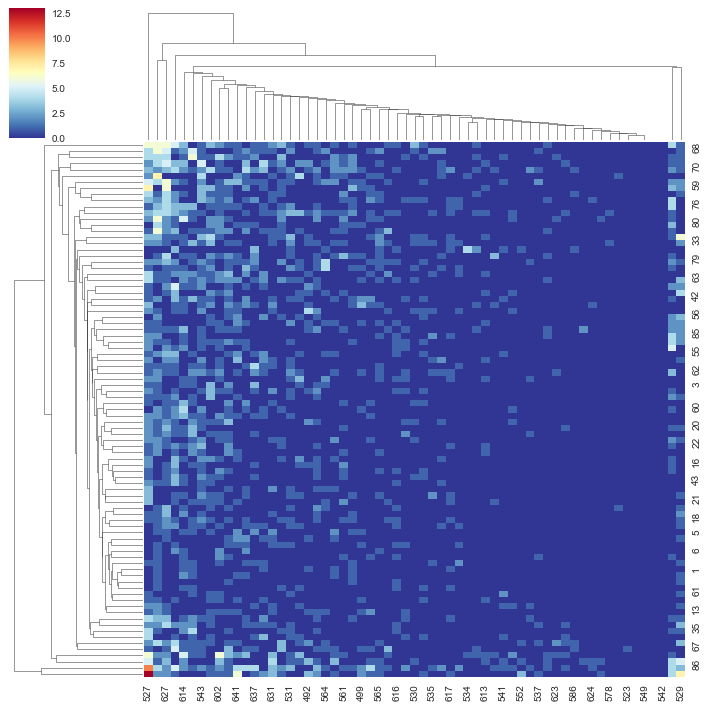

In [43]:
sns.clustermap(temp, annot=False, cmap = 'RdYlBu_r')

In [38]:
#making cluster_key_store_num.json
# key : store num, value : cluster_num 둘다 string
with open('../data/preprocessed/cluster_store.json', 'r') as f:
    cluster_store = json.load(f)


In [43]:
cluster_key_store = {}
for key, value in cluster_store.items():
    for store_id in value:
        cluster_key_store[str(store_id)] = key 

In [44]:
cluster_key_store

{'1': '0',
 '2': '0',
 '3': '0',
 '4': '0',
 '5': '0',
 '6': '0',
 '7': '0',
 '8': '0',
 '9': '0',
 '10': '0',
 '11': '0',
 '12': '0',
 '13': '0',
 '14': '0',
 '15': '0',
 '16': '0',
 '17': '0',
 '18': '0',
 '19': '0',
 '20': '0',
 '21': '0',
 '22': '0',
 '23': '0',
 '24': '0',
 '25': '0',
 '26': '0',
 '27': '0',
 '28': '0',
 '29': '0',
 '30': '0',
 '31': '0',
 '32': '0',
 '33': '0',
 '34': '0',
 '35': '0',
 '36': '0',
 '37': '0',
 '38': '0',
 '39': '0',
 '40': '0',
 '41': '0',
 '42': '0',
 '43': '0',
 '44': '0',
 '45': '0',
 '46': '0',
 '47': '0',
 '48': '0',
 '49': '0',
 '50': '0',
 '51': '0',
 '52': '0',
 '53': '0',
 '54': '0',
 '55': '0',
 '56': '0',
 '57': '0',
 '58': '0',
 '59': '0',
 '60': '0',
 '61': '0',
 '62': '0',
 '63': '0',
 '64': '0',
 '65': '0',
 '66': '0',
 '67': '0',
 '68': '0',
 '69': '0',
 '70': '0',
 '71': '0',
 '72': '0',
 '73': '0',
 '74': '0',
 '75': '0',
 '76': '0',
 '77': '0',
 '78': '0',
 '79': '0',
 '80': '0',
 '81': '0',
 '82': '0',
 '83': '0',
 '84': '0',
 

In [45]:
with open('../data/preprocessed/cluster_key_store_num.json', 'w') as f:
    json.dump(cluster_key_store, f)